In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
employ = np.genfromtxt('datasets_cleaned/employment/employ.csv', delimiter=',', dtype=['i8','U64','f8','f8','i8'], names=True)
poly = np.genfromtxt('datasets_cleaned/poly/poly_intake.csv', delimiter=',', dtype=['i8','U8','U64','i8','i8','i8'], names=True)
uni = np.genfromtxt('datasets_cleaned/uni/uni_intake.csv', delimiter=',', dtype=['i8','U8','U64','i8','i8','i8'], names=True)

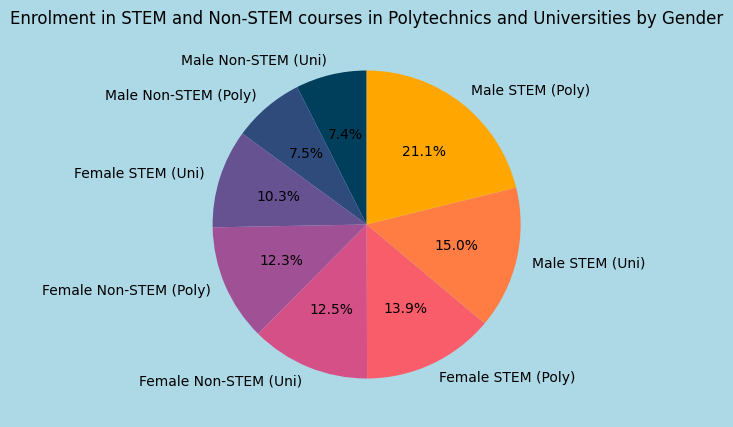

In [73]:
# Chart 0
# Pie chart comparinng the rate of enrollment in polytechnics and universities for STEM and Non-STEM courses and the different genders

labels = np.array(('Male STEM (Poly)', 'Female STEM (Poly)', 'Male Non-STEM (Poly)', 'Female Non-STEM (Poly)', 'Male STEM (Uni)', 'Female STEM (Uni)', 'Male Non-STEM (Uni)', 'Female Non-STEM (Uni)'))

MS_Poly = poly['enrolment'][(poly['sex']=='M') & ~np.isin(poly['course'],['Arts','Business','Education','Law'])].sum()
FS_Poly = poly['enrolment'][(poly['sex']=='F') & ~np.isin(poly['course'],['Arts','Business','Education','Law'])].sum()
MNS_Poly = poly['enrolment'][(poly['sex']=='M') & np.isin(poly['course'],['Arts','Business','Education','Law'])].sum()
FNS_Poly = poly['enrolment'][(poly['sex']=='F') & np.isin(poly['course'],['Arts','Business','Education','Law'])].sum()
MS_Uni = uni['enrolment'][(uni['sex']=='M') & ~np.isin(uni['course'],['Arts','Business','Education','Law'])].sum()
FS_Uni = uni['enrolment'][(uni['sex'] =='F') & ~np.isin(uni['course'],['Arts','Business','Education','Law'])].sum()
MNS_Uni = uni['enrolment'][(uni['sex']=='M') & np.isin(uni['course'],['Arts','Business','Education','Law'])].sum()
FNS_Uni = uni['enrolment'][(uni['sex'] =='F') & np.isin(uni['course'],['Arts','Business','Education','Law'])].sum()

sizes = np.array((MS_Poly, FS_Poly, MNS_Poly, FNS_Poly, MS_Uni, FS_Uni, MNS_Uni, FNS_Uni))
# on argsort: https://www.geeksforgeeks.org/numpy-argsort-in-python/
labels = labels[np.argsort(sizes)]
sizes = np.sort(sizes)
colors = ['#003f5c','#2f4b7c','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600']

fig,ax = plt.subplots(figsize=(15,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Enrolment in STEM and Non-STEM courses in Polytechnics and Universities by Gender')
fig.set_facecolor("lightblue")





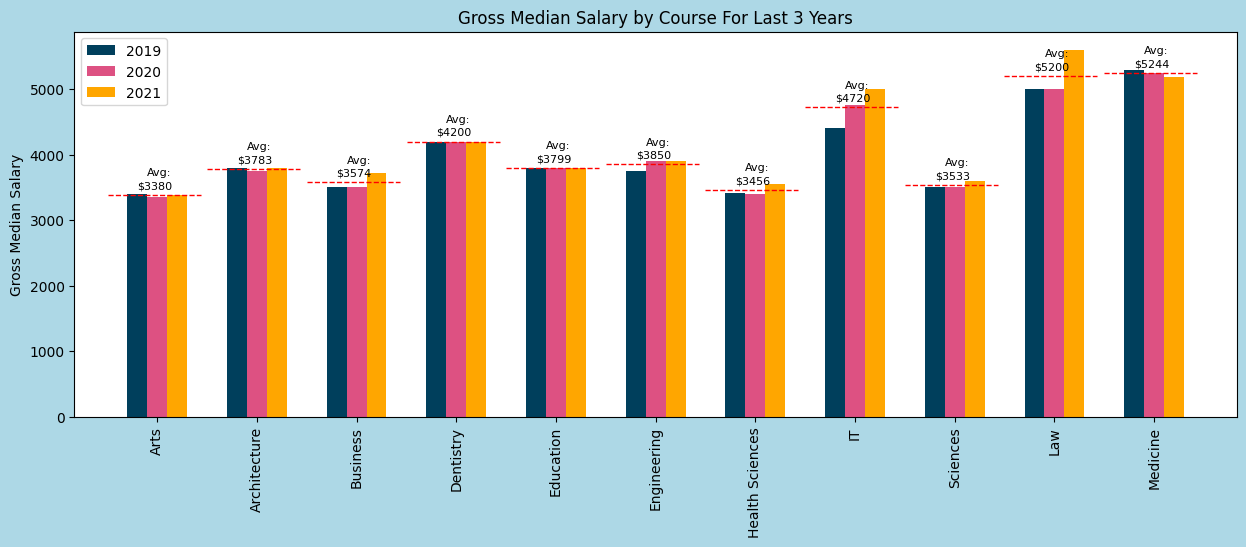

In [57]:
# Chart 1
# Gross Median Salary of each course for the past three years

# np.unique sorts the unique values
# By using return_index = True, we get the initial unsorted index of each unique value
# https://stackoverflow.com/questions/12926898/numpy-unique-without-sort
u, ind = np.unique(employ['course_cluster'],return_index=True)
# We can now 'unsort' the unique values by using the index
# By calling argsort, we get the initial (unsorted) array indices
# We can then use these indices to get the initial unsorted array
labels = u[np.argsort(ind)]

N = len(labels)
C = [0]*(2022-2019)
for i in range(2019,2022):
    C[i-2019] = employ['gross_median_salary'][employ['year'] == i]
width = 0.2


fig, ax = plt.subplots()
fig.set_facecolor("lightblue")
# The same as plt.figure(figsize(15,5))
fig.set_size_inches(15, 5)
# 2019
rects1 = ax.bar(np.arange(N) - width, C[0], width, label='2019', color='#003f5c')

# 2020
rects2 = ax.bar(np.arange(N), C[1], width, label='2020',color='#dd5182')


# 2021
rects3 = ax.bar(np.arange(N) + width, C[2], width, label='2021',color='#ffa600')

for i in range(11):
# add a horizontal line for each label
    min_x = i*120/1400+27/700
    ax.axhline((C[0][i]+C[1][i]+C[2][i])/3, color='r', linestyle='--', linewidth = 1,xmin=min_x-0.01, xmax=min_x+0.07)
    ax.text(i-0.2, (C[0][i]+C[1][i]+C[2][i])/3+100, f'${round((C[0][i]+C[1][i]+C[2][i])/3)}',fontsize=8,color='black')
    ax.text(i-0.1, (C[0][i]+C[1][i]+C[2][i])/3+300, 'Avg:',fontsize=8,color='black')

ax.legend()
ax.set_xticks(np.arange(N))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel('Gross Median Salary')
ax.set_title('Gross Median Salary by Course For Last 3 Years')



plt.show()

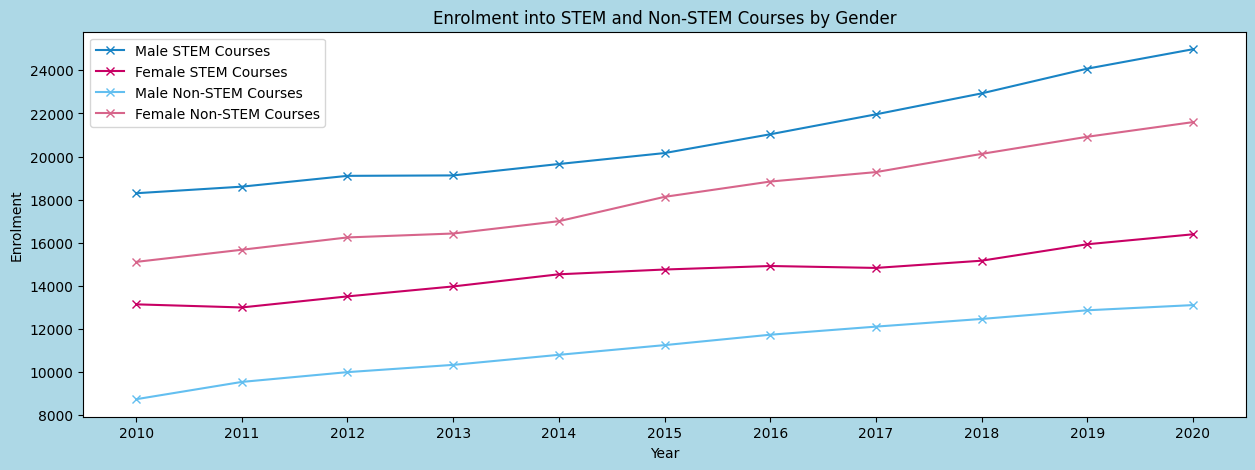

In [58]:
# Chart 2
# Trend of STEM course enrollment and non-STEM course enrollment for different genders over the past 10 years
M_S_courses = [0]*(2021-2010)
M_NS_courses = [0]*(2021-2010)
F_S_courses = [0]*(2021-2010)
F_NS_courses = [0]*(2021-2010)

# ~ returns those not in the list
# Little read up on truth error in numpy: https://note.nkmk.me/en/python-numpy-pandas-value-error-ambiguous/
for i in range(2010,2021):
    M_NS_courses[i-2010] = uni['enrolment'][(uni['year'] == i) & (uni['sex']=='M') & np.isin(uni['course'],['Arts','Business','Education','Law'])].sum()
    M_S_courses[i-2010] = uni['enrolment'][(uni['year'] == i) & (uni['sex']=='M') & ~np.isin(uni['course'],['Arts','Business','Education','Law'])].sum()
    F_NS_courses[i-2010] = uni['enrolment'][(uni['year'] == i) & (uni['sex']=='F') & np.isin(uni['course'],['Arts','Business','Education','Law'])].sum()
    F_S_courses[i-2010] = uni['enrolment'][(uni['year'] == i) & (uni['sex']=='F') & ~np.isin(uni['course'],['Arts','Business','Education','Law'])].sum()

xlabels = np.arange(2010,2021)
fig = plt.figure()
fig.set_facecolor("lightblue")
fig.set_size_inches(15, 5)


plt.plot(M_S_courses,label='Male STEM Courses',color='#1984c5',marker='x')
plt.plot(F_S_courses,label='Female STEM Courses',color='#c80064',marker='x')
plt.plot(M_NS_courses,label='Male Non-STEM Courses',color='#63bff0',marker='x')
plt.plot(F_NS_courses,label='Female Non-STEM Courses',color='#d7658b',marker='x')

plt.xticks(np.arange(11),xlabels)
plt.legend()
plt.ylabel('Enrolment')
plt.xlabel('Year')
plt.title('Enrolment into STEM and Non-STEM Courses by Gender')
plt.show()

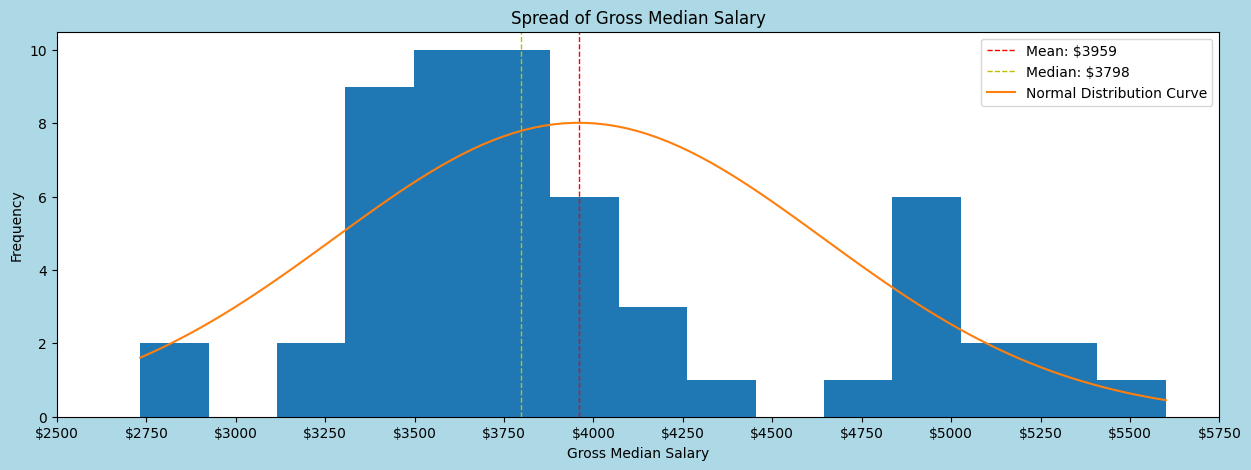

In [59]:
# Chart 3
# Histogram to see spread of gross median salary

data = employ['gross_median_salary']

fig = plt.figure()
fig.set_facecolor("lightblue")
fig.set_size_inches(15, 5)

plt.hist(data, bins=15)

mean = np.mean(data)
median = np.median(data)
stdev = np.std(data)

# Plot a vertical line to show mean and median in the histogram
plt.axvline(mean, color='r', linestyle='--', linewidth = 1)
plt.axvline(median, color='y', linestyle='--', linewidth = 1)

# Plot a normal distribution curve to compare the distribution of the data with a normal distribution

# Get the x value for the normal distribution 
# With a 100 values ranging from the min and the max of the data
x = np.linspace(min(data),max(data),100)
# Get the y value (using population density function) for normal distribution
# Since y is the population density function, the area under the curve is 1
# However, our histogram is not normalized so the area under the curve is not 1 (we did not set density=True)
# So we need to 'un'normalize the curve by multiplying the area under the curve by the number of data points

# From matplotlib documentation:
# -------------------------------------------------------------------------------------------------#
# If True, draw and return a probability density: each bin will display the bin's raw count divided 
# by the total number of counts and the bin width (density = counts / (sum(counts) * np.diff(bins))), 
# so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).
# -------------------------------------------------------------------------------------------------#
# i.e. if we had set Density = True, we would not need the multiplication by len(data)*bin_width
bin_width = 250
y = ((1/(stdev * np.sqrt(2*np.pi)))*np.exp(-0.5*((x-mean)/stdev)**2))*(len(data)*bin_width)
plt.plot(x, y)

# make a legend labelling mean and median line
plt.legend([f'Mean: ${mean:1.0f}',f'Median: ${median:1.0f}',f'Normal Distribution Curve'])


plt.title('Spread of Gross Median Salary')
plt.xlabel('Gross Median Salary')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter('${x:1.0f}')
plt.xticks(np.arange(2500, 6000, bin_width))



plt.show()



Probability Density Function Formula:

## $f(x)=$ $\frac{1}{\sigma\sqrt {2\pi}}$ ${e}^{{-\frac{1}{2}}{(\frac{x-\mu}{\sigma})^2}}$

- $f(x) = $ Probablity Density Function
- $\sigma = $ Standard Deviation
- $\mu = $ Mean

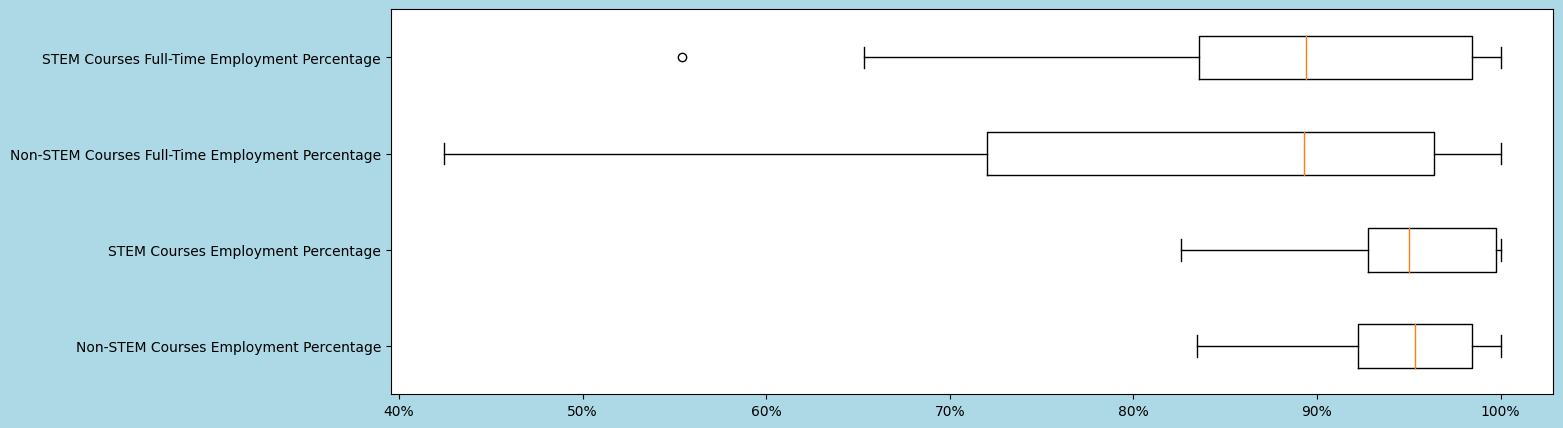

In [60]:
# Chart 4
# Compound box plot to see the spread of employed percentage and full time employment percentage for STEM and Non STEM courses

u, ind = np.unique(employ['course_cluster'],return_index=True)
labels = u[np.argsort(ind)]


E_NS_courses = employ['employed'][np.isin(employ['course_cluster'],['Arts','Business','Education','Law'])]
E_S_courses = employ['employed'][~np.isin(employ['course_cluster'],['Arts','Business','Education','Law'])]
FT_NS_courses = employ['ft_employment'][np.isin(employ['course_cluster'],['Arts','Business','Education','Law'])]
FT_S_courses = employ['ft_employment'][~np.isin(employ['course_cluster'],['Arts','Business','Education','Law'])]

data = [E_NS_courses,E_S_courses,FT_NS_courses,FT_S_courses]
labels = ['Non-STEM Courses Employment Percentage', 'STEM Courses Employment Percentage', 'Non-STEM Courses Full-Time Employment Percentage', 'STEM Courses Full-Time Employment Percentage']

fig = plt.figure()
fig.set_facecolor("lightblue")
# The same as plt.figure(figsize(15,5))
fig.set_size_inches(15, 5)

plt.gca().xaxis.set_major_formatter('{x:1.0f}%')




plt.boxplot(data,labels=labels,vert=False)
plt.show()

